# INTRUSION DETECTION SYSTEM USING SUPERVISED MACHINE LEARNING CODE (Name: Shubham Kumar)

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Giving Features Names

In [37]:
columns ="duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"
Features =[]
for i in columns.split(','):
    if(i.strip()):
        Features.append(i.strip())
Features.append('target')
print(len(Features))

42


Reading Attacks file

In [38]:
with open(r"C:\Users\SHUBHAM KUMAR\Desktop\Thesis\Intrusion-Detection-System-master\dataset\training_attack_types", 'r') as atktyp:
    print(atktyp.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




Map Normal and attacks types to its attacks categories

In [39]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

Loading the 10% of KDD'99 dataset

In [40]:
file_path = r"C:\Users\SHUBHAM KUMAR\Desktop\Thesis\Intrusion-Detection-System-master\dataset\kddcup.data_10_percent.gz"
data_file = pd.read_csv(file_path, names = Features)
data_file['Attack Type'] = data_file.target.apply(lambda r:attacks_types[r[:-1]])

In [41]:
data_file.shape

(494021, 43)

In [42]:
data_file.isnull().sum().sum()

0

Finding Features which have numeric values

In [43]:
numeric_features = data_file._get_numeric_data().columns
categorical_features = list(set(data_file.columns)-set(numeric_features))
categorical_features.remove('target')
categorical_features.remove('Attack Type')
categorical_features

['service', 'protocol_type', 'flag']

Using Pearson's correlation method for removing unnecessary features

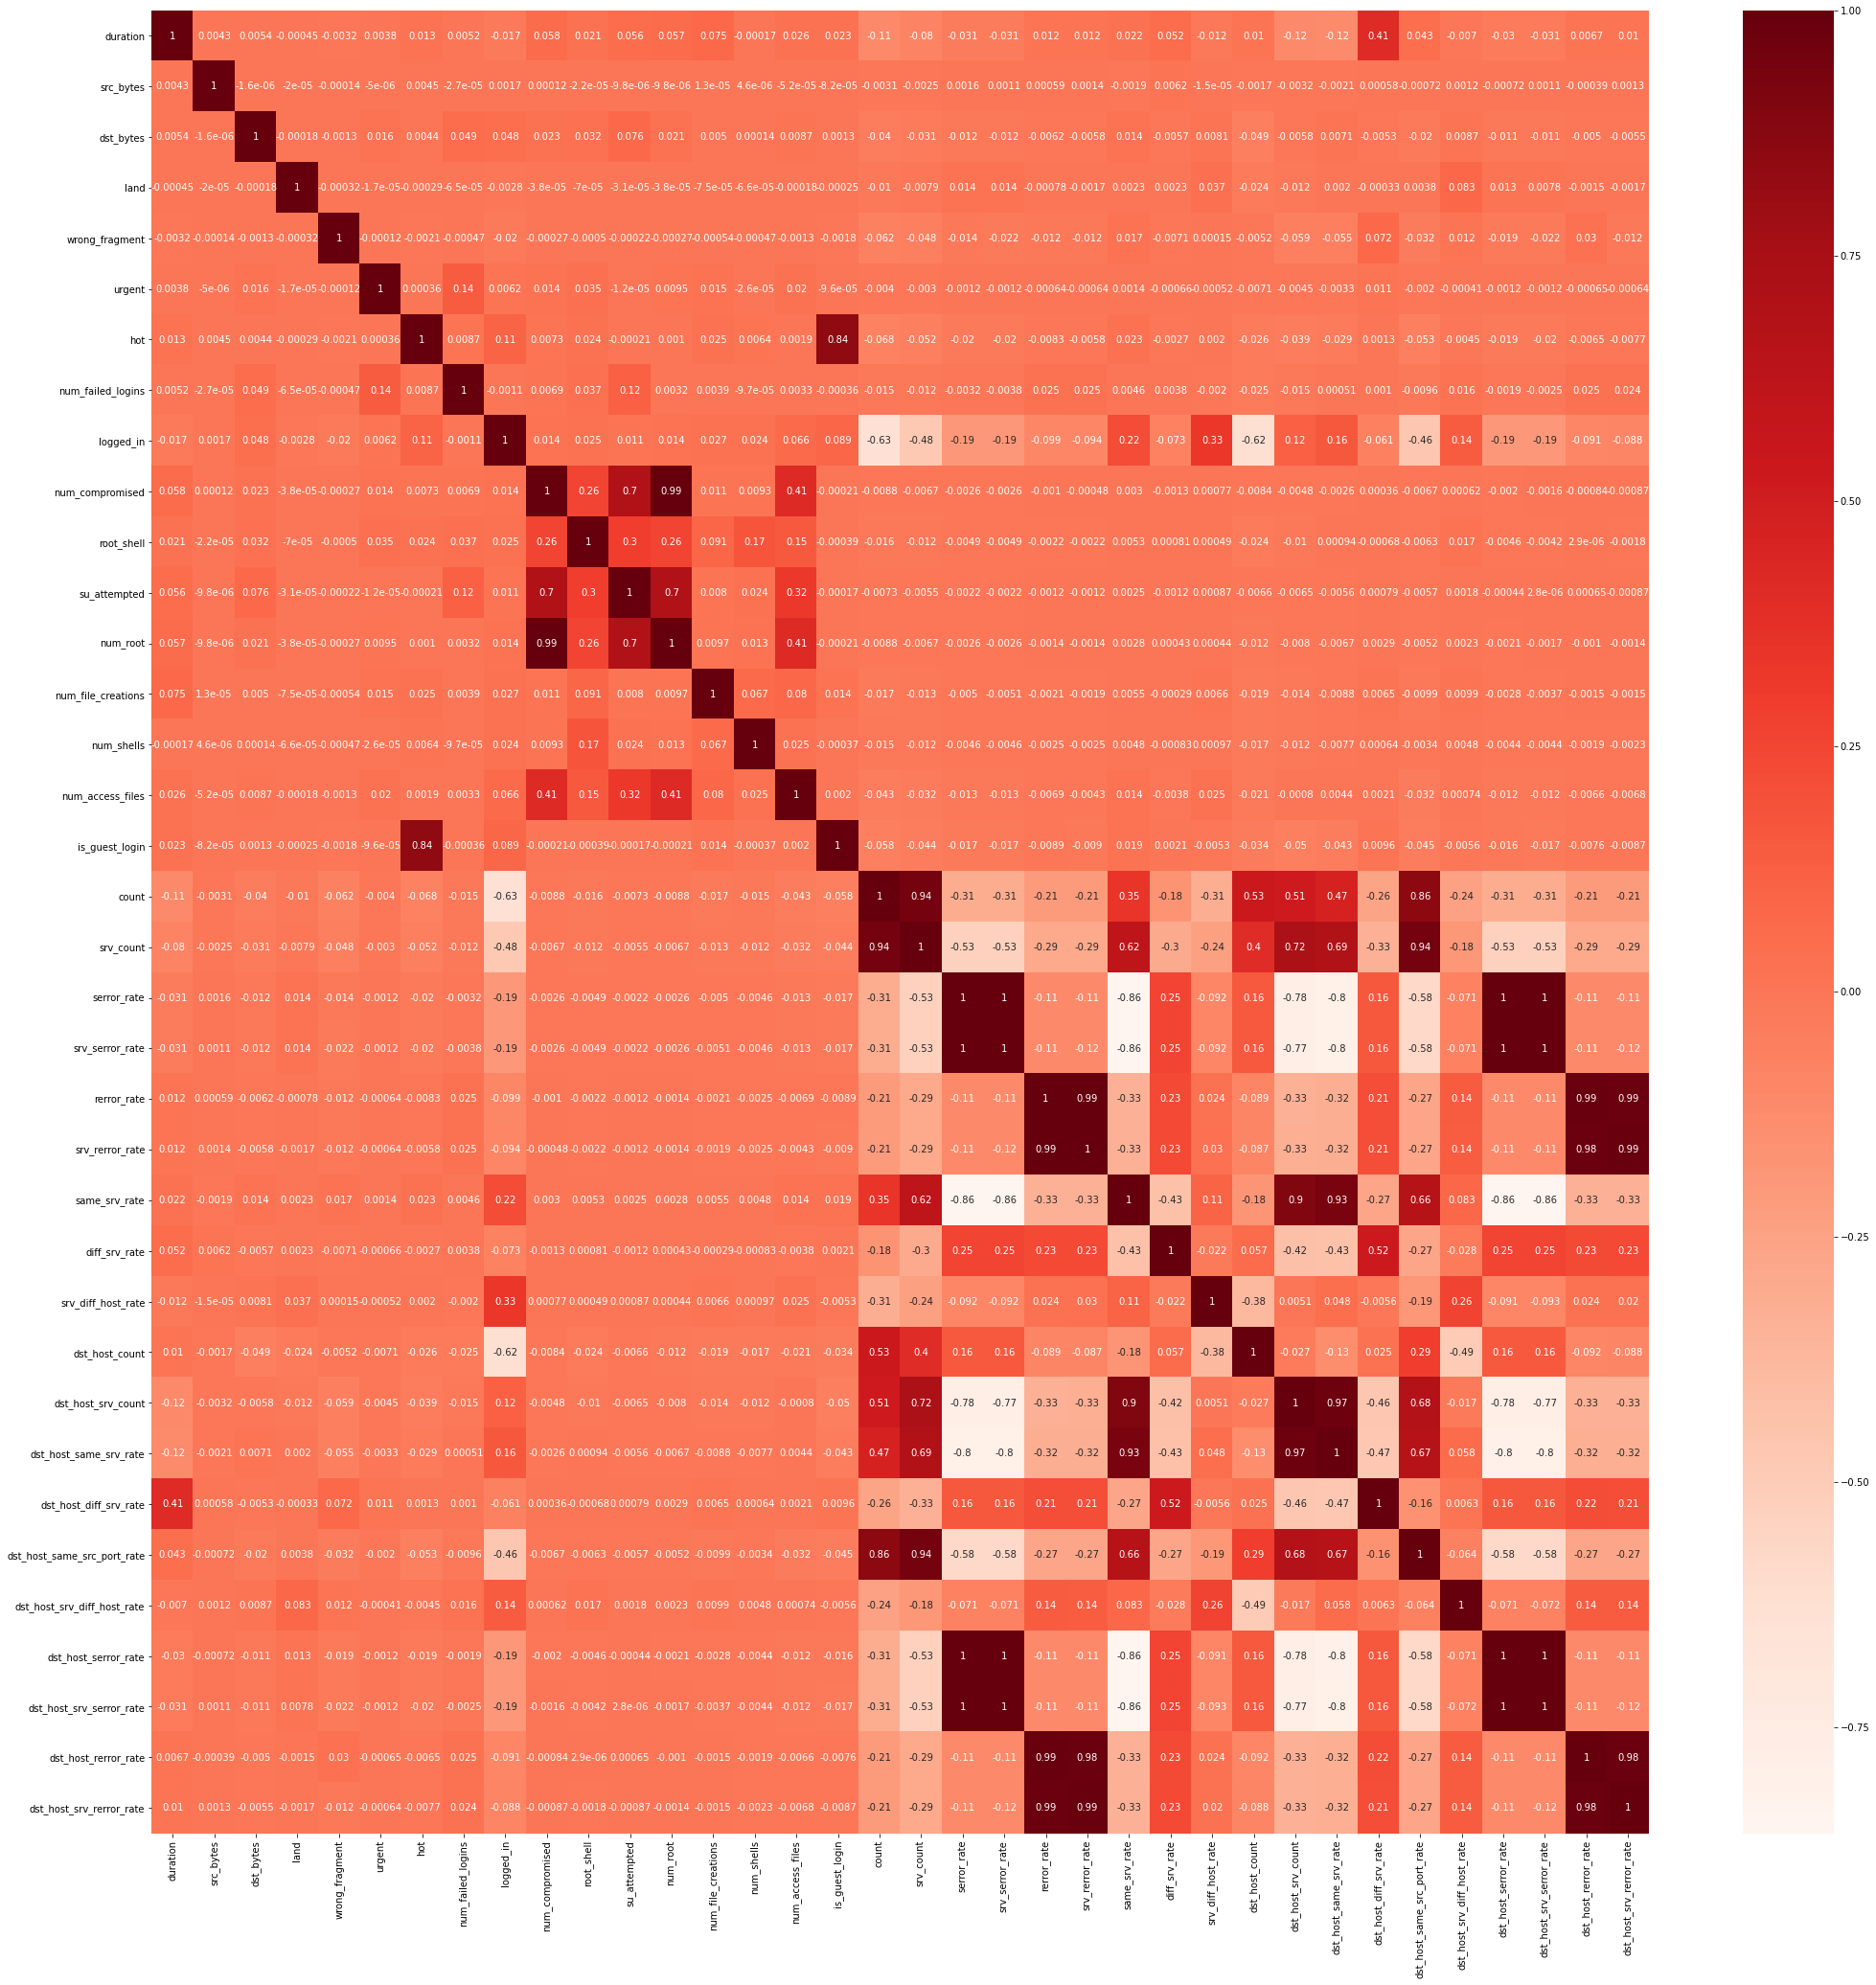

In [44]:
data_file= data_file.dropna('columns')
data_file = data_file[[col for col in data_file if data_file[col].nunique() > 1]]
corr = data_file.corr(method ='pearson',min_periods=1)
plt.figure(figsize =(35,35))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Droping correlated features

In [45]:
data_file.drop('num_root', axis = 1, inplace = True)
data_file.drop('srv_serror_rate', axis = 1, inplace = True)
data_file.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
data_file.drop('dst_host_serror_rate', axis = 1, inplace = True)
data_file.drop('srv_rerror_rate', axis = 1, inplace = True)
data_file.drop('dst_host_rerror_rate', axis = 1, inplace = True)
data_file.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
data_file.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

After Removing the noise data, we get usefull features now

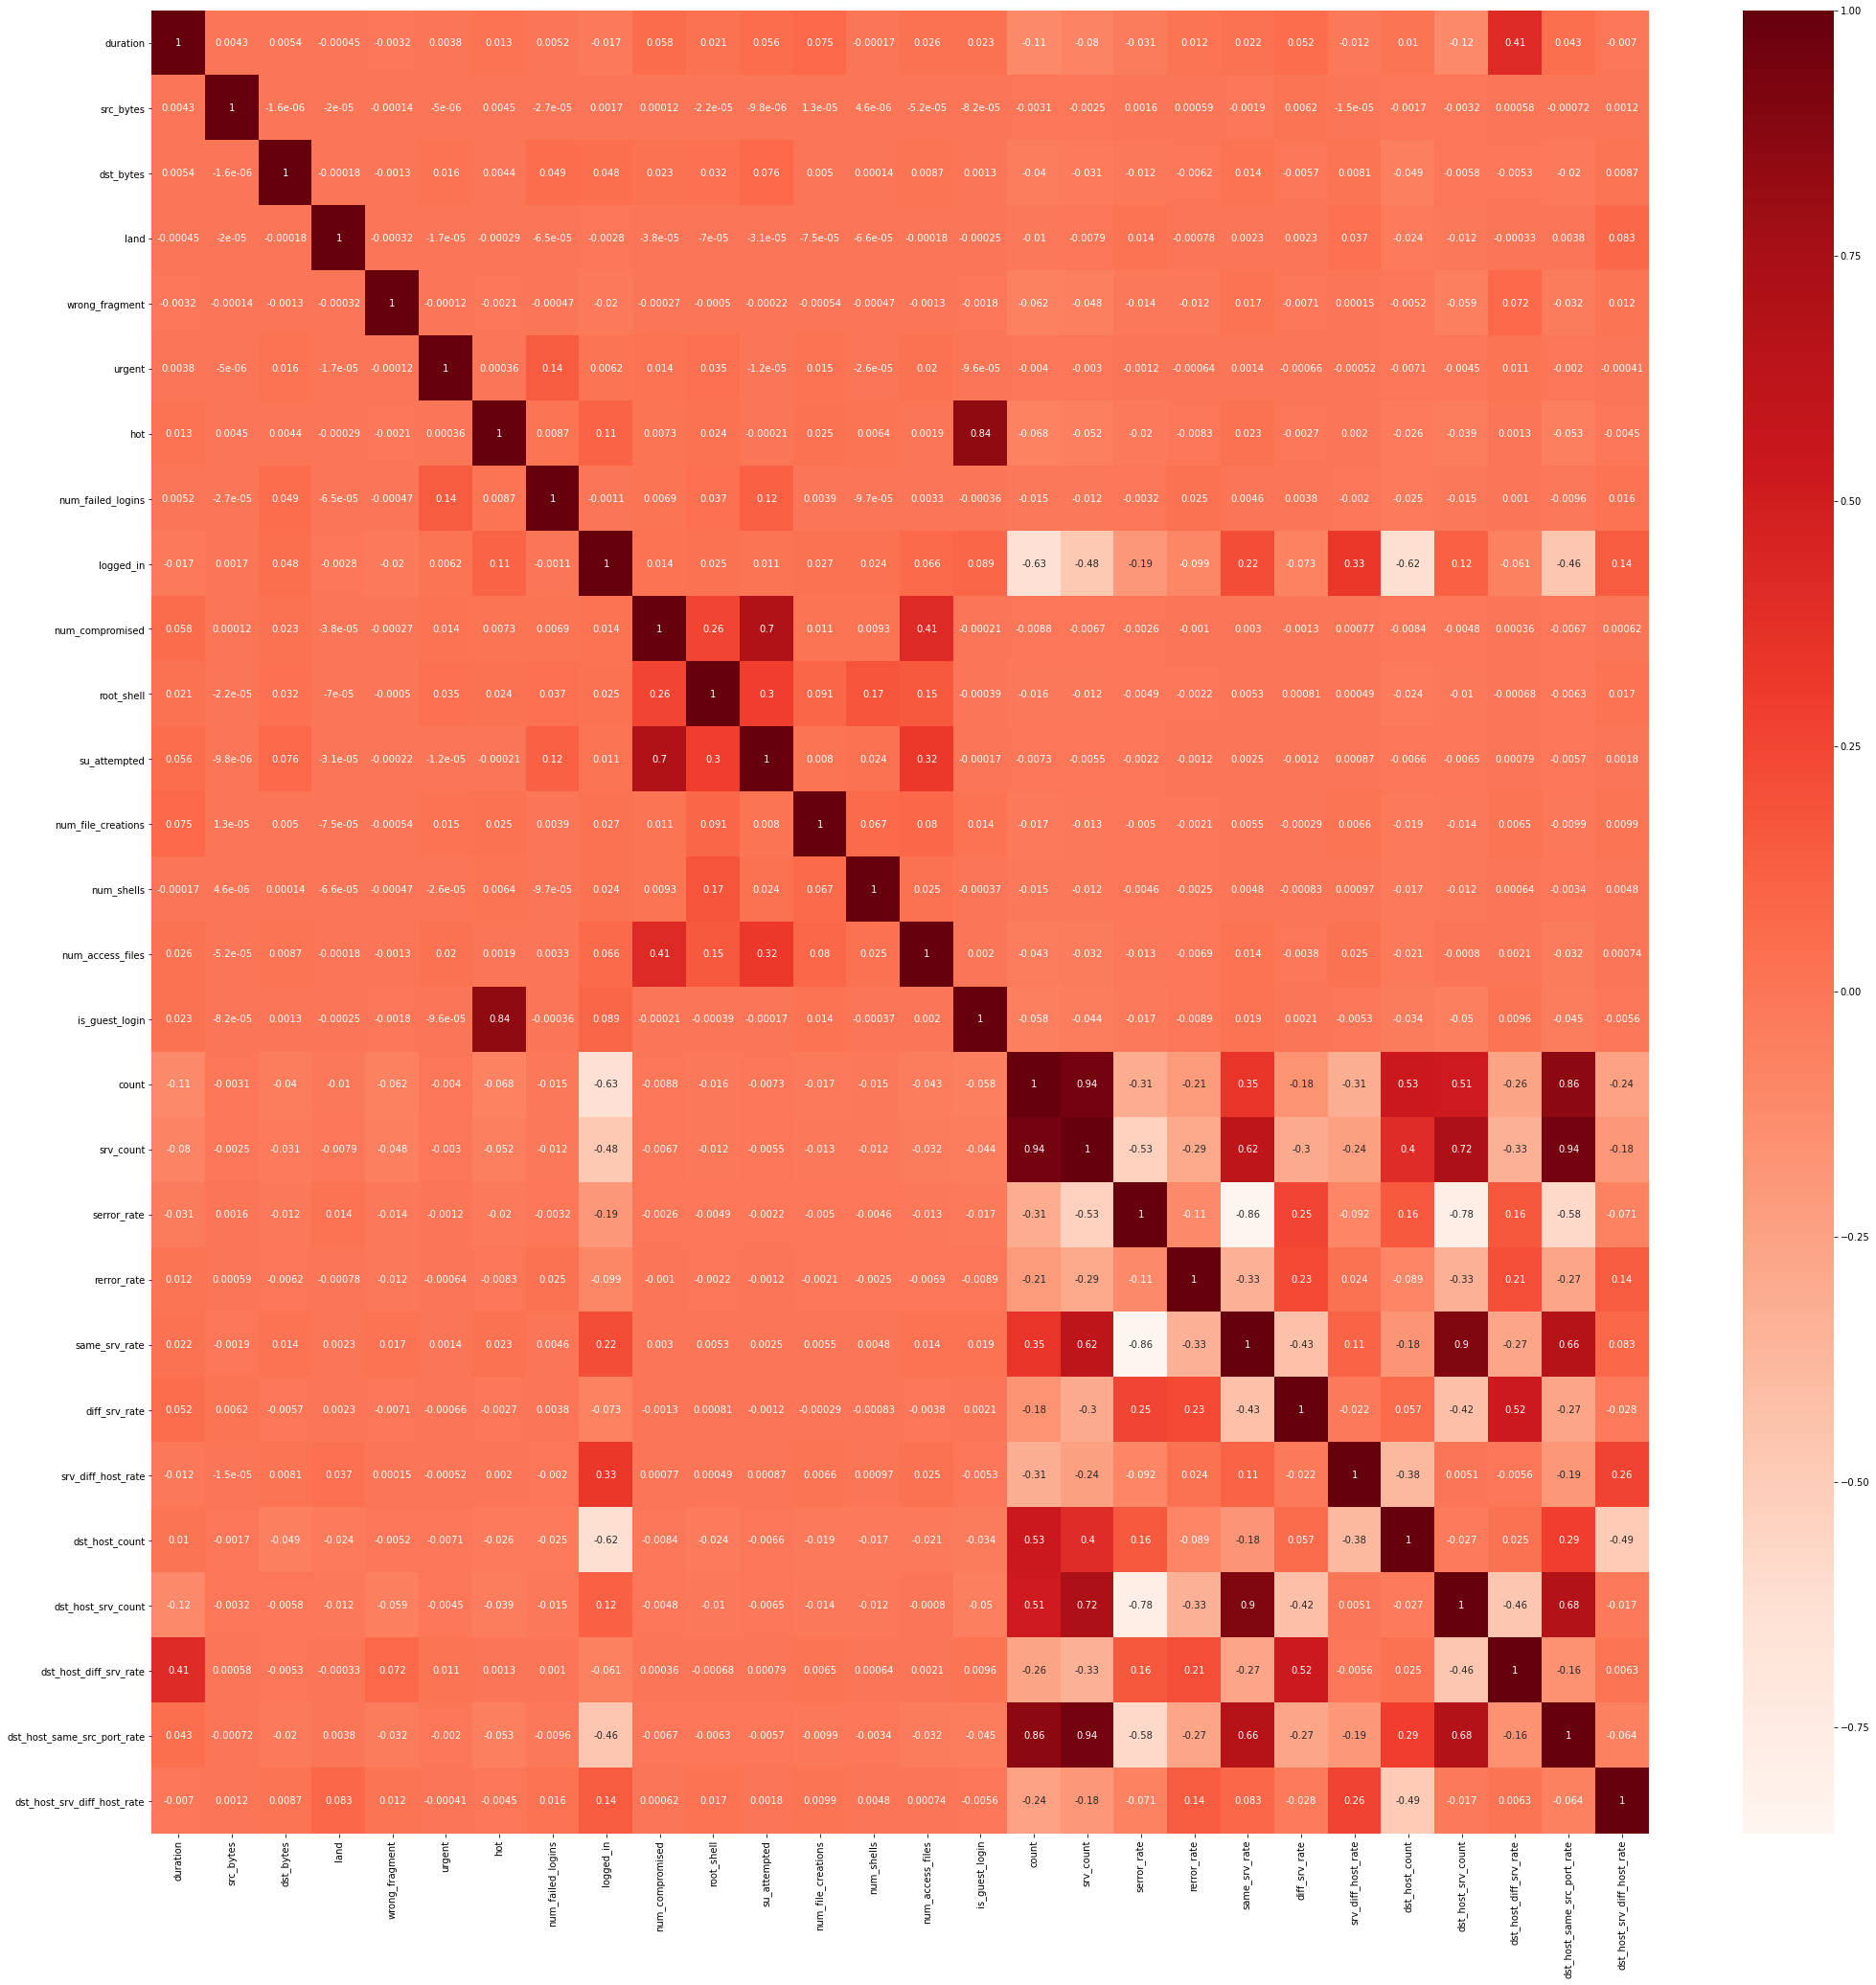

In [46]:
data_file = data_file.dropna('columns')
data_file = data_file[[col for col in data_file if data_file[col].nunique() > 1]]
corr = data_file.corr(method ='pearson',min_periods=1)
plt.figure(figsize =(35,35))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Mapping protocol_type's non numeric values to numeric values

In [47]:
protocol_map = {'icmp':0, 'tcp':1, 'udp':2}
data_file['protocol_type'] = data_file['protocol_type'].map(protocol_map)

Mapping Flag's non numeric values to numeric values

In [48]:
flag_map = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
data_file['flag'] = data_file['flag'].map(flag_map)

In [49]:
data_file.drop('service', axis = 1, inplace = True)

Dividing the dataset into two parts i.e., training and testing

In [50]:
data_file = data_file.drop(['target', ], axis = 1)
print(data_file.shape)

y = data_file[['Attack Type']]
X = data_file.drop(['Attack Type', ], axis = 1)
mimxsc = MinMaxScaler()
X = mimxsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


Applying Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
dtclf.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time of Model: ", end_time-start_time)

Training time of Model:  1.849266767501831


In [53]:
start_time = time.time()
y_test_pred = dtclf.predict(X_train)
end_time = time.time()
print("Testing time of Model: ", end_time-start_time)

Testing time of Model:  0.47588515281677246


In [54]:
print("Train score is:", dtclf.score(X_train, y_train))
print("Test score is:", dtclf.score(X_test, y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


Applying Support Vector Machine

In [55]:
from sklearn.svm import SVC
svmclf = SVC(gamma = 'scale')
start_time = time.time()
svmclf.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time of Model: ", end_time-start_time)

Training time:  155.2373058795929


In [56]:
start_time = time.time()
y_test_pred = svmclf.predict(X_train)
end_time = time.time()
print("Testing time of Model: ", end_time-start_time)

Testing time of Model:  82.0910906791687


In [57]:
print("Train score is:", svmclf.score(X_train, y_train))
print("Test score is:", svmclf.score(X_test, y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


Applying Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lrclsf=LogisticRegression(max_iter=1200000)
start_time=time.time()
lrclsf.fit(X_train,y_train.values.ravel())
end_time=time.time()
print("Training time of Model: ", end_time-start_time)

Training time of Model:  60.23391795158386


In [59]:
start_time = time.time()
y_test_pred = lrclsf.predict(X_train)
end_time = time.time()
print("Testing time of Model: ", end_time-start_time)

Testing time of Model:  0.05983901023864746


In [60]:
print("Train score is:", lrclsf.score(X_train, y_train))
print("Test score is:", lrclsf.score(X_test, y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


Comparision Bar graph between Decision Tree, Support Vector Machine, Logistic Regression

<BarContainer object of 3 artists>

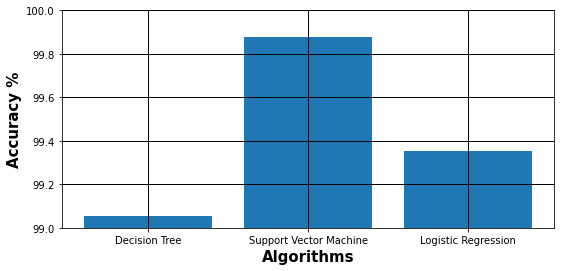

In [61]:
clsf=['Decision Tree','Support Vector Machine','Logistic Regression']
data=[99.0523,99.8791,99.3528]
fig=plt.figure(figsize=(30,4))
plt.subplot(131,ylim=(99.00,100.00))
plt.grid(axis='both',color ='black',linewidth = 1)
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
plt.bar(clsf,data)

## HAPPY LEARNING